In [1]:
# Dependencies
import numpy as np
import datetime as dt
import pandas as pd
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

In [2]:
engine = create_engine("sqlite:///hawaii.sqlite")

# reflect an existing database into a new model
Base = automap_base()
# reflect the tables
Base.prepare(engine, reflect=True)

# Save references to each table
Measurement = Base.classes.measurement
Station = Base.classes.station

In [3]:
# Create our session (link) from Python to the DB
session = Session(engine)

## D1: Determine the Summary Statistics for June

In [19]:
# 1. Import the sqlalchemy extract function.
from sqlalchemy import extract

# 2. Write a query that filters the Measurement table to retrieve the temperatures for the month of June. 
june_results = session.query(Measurement.date, Measurement.tobs).filter(extract('month', Measurement.date) == 6).all()

In [5]:
# 3. Convert the June temperatures to a list.
type(june_results)

list

In [6]:
# 4. Create a DataFrame from the list of temperatures for the month of June. 
june_df = pd.DataFrame(june_results, columns=['date','June Temps'])
june_df.head(10)

,date,June Temps
0,2010-06-01,78.0
1,2010-06-02,76.0
2,2010-06-03,78.0
3,2010-06-04,76.0
4,2010-06-05,77.0
5,2010-06-06,78.0
6,2010-06-07,77.0
7,2010-06-08,78.0
8,2010-06-09,78.0
9,2010-06-10,79.0


In [7]:
# 5. Calculate and print out the summary statistics for the June temperature DataFrame.
june_df.describe()

,June Temps
count,1700.000000
mean,74.944118
std,3.257417
min,64.000000
25%,73.000000
50%,75.000000
75%,77.000000
max,85.000000


## D2: Determine the Summary Statistics for December

In [20]:
# 6. Write a query that filters the Measurement table to retrieve the temperatures for the month of December.
dec_results = session.query(Measurement.date, Measurement.tobs).filter(extract('month', Measurement.date) == 12).all()

In [17]:
# 3. Convert the June temperatures to a list.
type(dec_results)

list

In [21]:
# 8. Create a DataFrame from the list of temperatures for the month of December. 
dec_df = pd.DataFrame(dec_results, columns=['date','Dec Temps'])
dec_df.head(10)

,date,Dec Temps
0,2010-12-01,76.0
1,2010-12-03,74.0
2,2010-12-04,74.0
3,2010-12-06,64.0
4,2010-12-07,64.0
5,2010-12-08,67.0
6,2010-12-09,77.0
7,2010-12-10,66.0
8,2010-12-11,69.0
9,2010-12-12,68.0


In [22]:
# 9. Calculate and print out the summary statistics for the Decemeber temperature DataFrame.
dec_df.describe()

,Dec Temps
count,1517.000000
mean,71.041529
std,3.745920
min,56.000000
25%,69.000000
50%,71.000000
75%,74.000000
max,83.000000


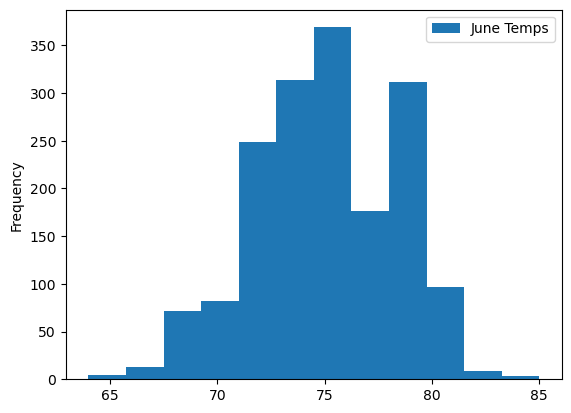

In [23]:
# Histogram for June
from matplotlib import pyplot as plt
june_df.plot.hist(bins=12)
plt.savefig("Images/June_Histogram.png")

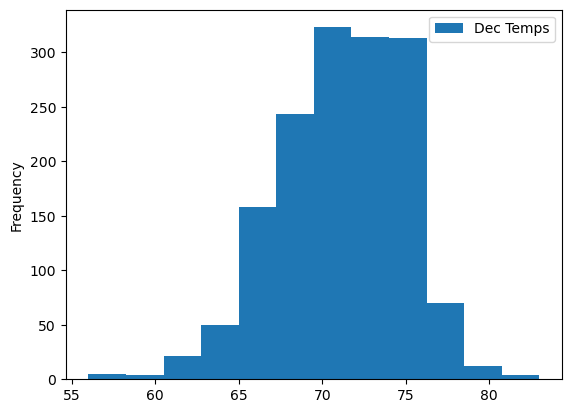

In [24]:
# Histogram for December
dec_df.plot.hist(bins=12)
plt.savefig("Images/Dec_Histogram.png")